# Sales Data Analysis

### Step 1: Data Collection:

Obtain sales data from the store, which might include details like date, product ID, product name, category, sales amount, quantity sold, customer information, etc.

First, let's load the data from the retail_sales_dataset.csv file into a pandas DataFrame.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows to understand the structure of the dataset
print(df.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


This will give us an overview of what columns are in the dataset and what kind of data we have.

### Step 2: Data Cleaning
Next, we need to clean the data. This includes checking for missing values, removing duplicates, and correcting any data inconsistencies.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Confirm that duplicates are removed
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 1000


### Step 3: Data Analysis
We'll perform some key analyses to gain insights from your dataset. Here are the sub-steps:

### a) Sales Over Time
We'll analyze how the total sales have varied over time.

In [9]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate total sales per day
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Display the first few rows of the sales over time
print(sales_over_time.head())


        Date  Total Amount
0 2023-01-01          3600
1 2023-01-02          1765
2 2023-01-03           600
3 2023-01-04          1240
4 2023-01-05          1100


### b) Sales by Product Category
We'll determine which product categories are generating the most revenue.

In [11]:
# Group the data by product category and calculate total sales for each category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

# Display the sales by product category
print(sales_by_category)


  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


### c) Customer Demographics 
We'll look at the demographics (age, gender) of the customers who are purchasing the most.

In [13]:
# Group by gender and calculate total sales
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Group by age and calculate total sales
sales_by_age = df.groupby('Age')['Total Amount'].sum().reset_index()

# Display the results
print(sales_by_gender)
print(sales_by_age.head())


   Gender  Total Amount
0  Female        232840
1    Male        223160
   Age  Total Amount
0   18         11215
1   19         14870
2   20          8645
3   21         12585
4   22         13700


### Step4: Data Visualization

To visualize your dataset comprehensively in Python, you can use libraries like matplotlib, seaborn, and plotly for different types of plots. Here's how you can create various visualizations based on your dataset:


#### Sales Over Time: Line chart showing how total sales vary by date.

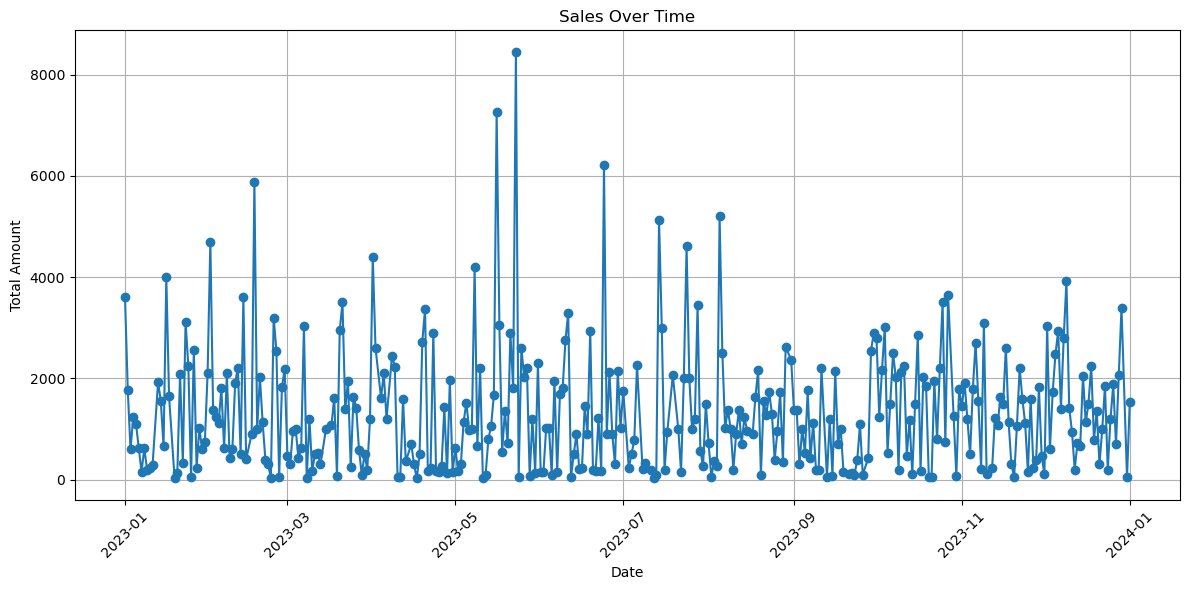

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate total sales
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Total Amount'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Sales by Product Category: Bar chart showing total sales for each product category.


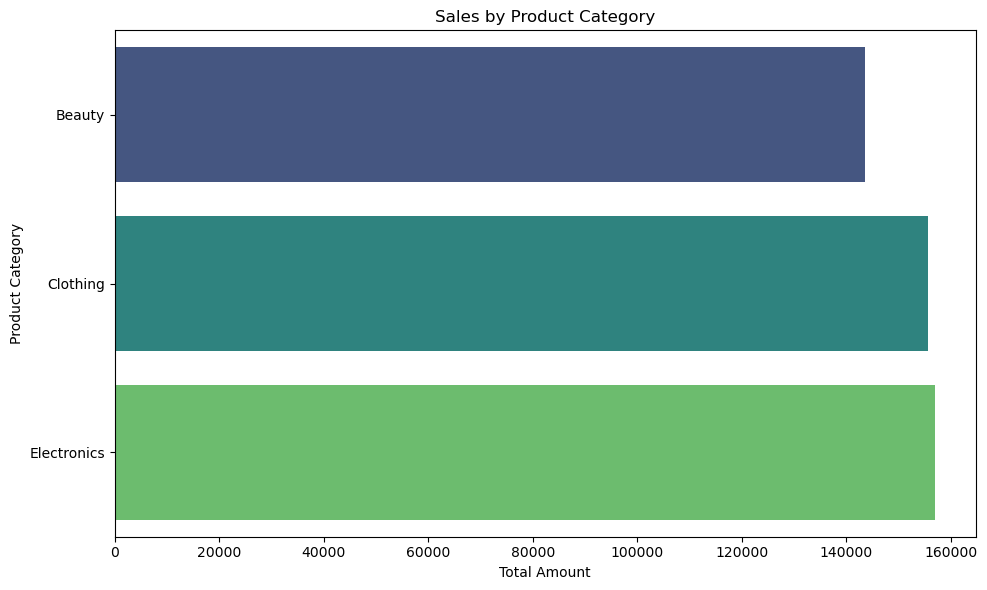

In [47]:
import seaborn as sns

# Group by product category and calculate total sales
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Category', data=sales_by_category, palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


#### Sales by Gender: Pie chart displaying the proportion of total sales by gender.

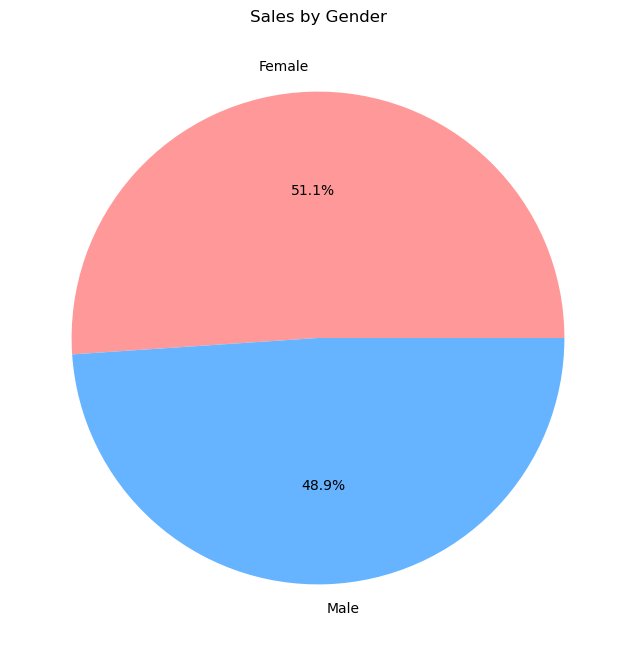

In [24]:
# Group by gender and calculate total sales
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sales_by_gender['Total Amount'], labels=sales_by_gender['Gender'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sales by Gender')
plt.show()


#### Sales by Age: Bar chart displaying total sales for each age group.

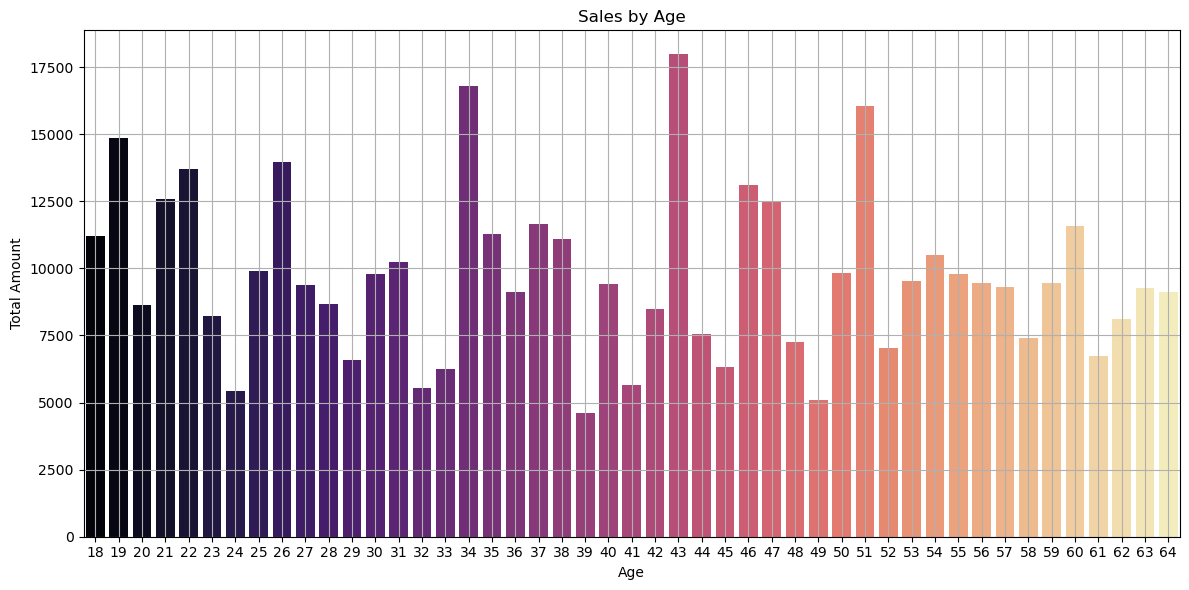

In [26]:
# Group by age and calculate total sales
sales_by_age = df.groupby('Age')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Amount', data=sales_by_age, palette='magma')
plt.title('Sales by Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Box Plot (for Total Amount by Product Category)
Box plots are useful for understanding the distribution and identifying outliers.

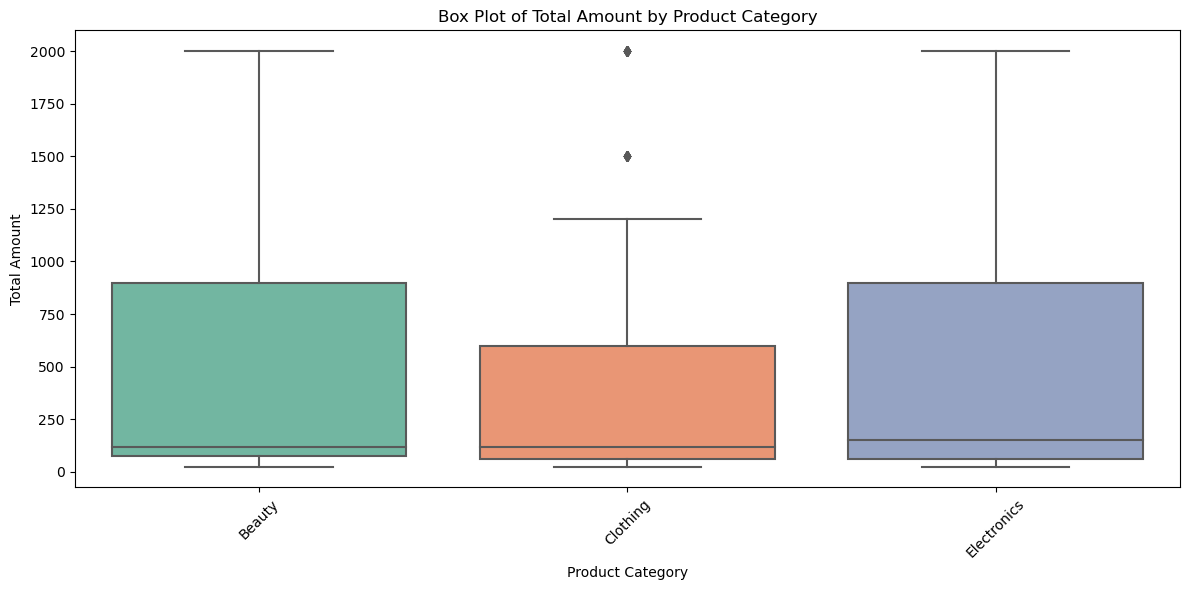

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Total Amount by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=df, palette='Set2')
plt.title('Box Plot of Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Scatter Plot (for Total Amount vs. Quantity)
Scatter plots help visualize the relationship between two numerical variables.

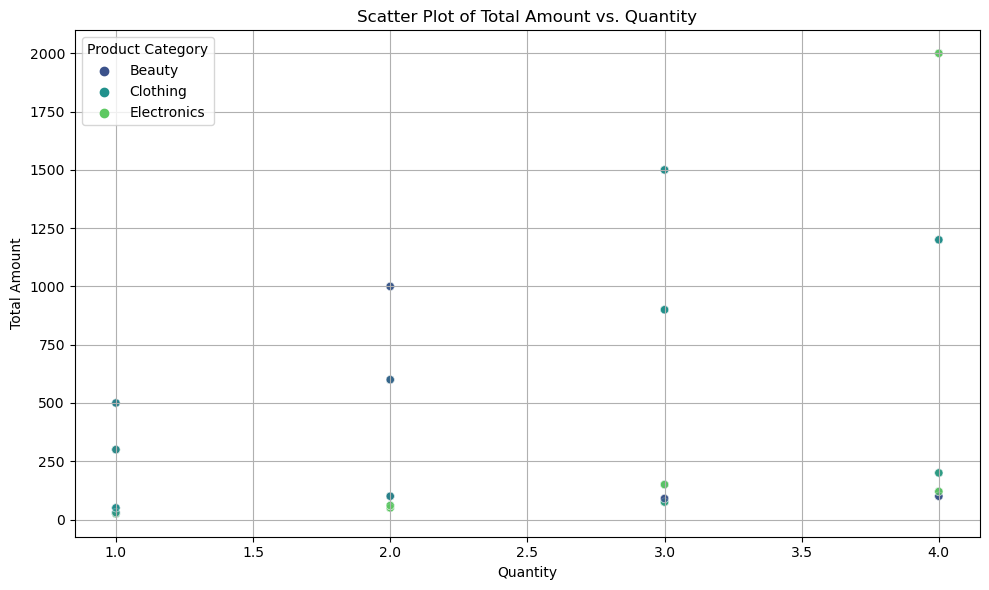

In [30]:
# Scatter plot for Total Amount vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Amount', data=df, hue='Product Category', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Total Amount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Violin Plot (for Total Amount by Age)
Violin plots provide a visualization of the distribution of the data across different categories, similar to a box plot but with more detail.

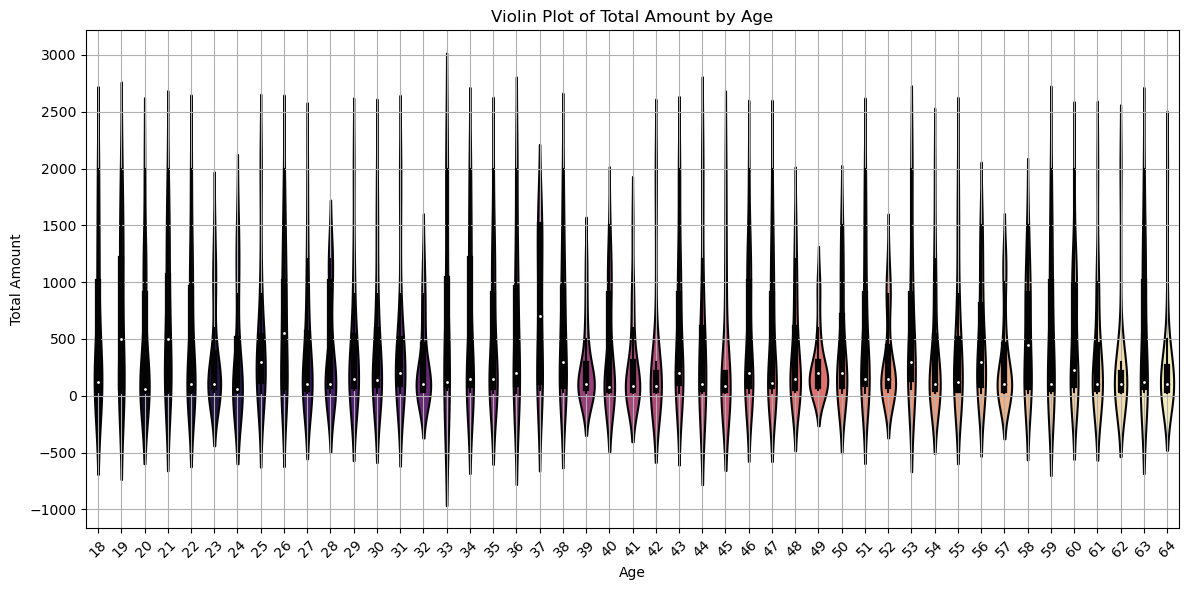

In [32]:
# Violin plot for Total Amount by Age
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age', y='Total Amount', data=df, palette='magma')
plt.title('Violin Plot of Total Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Heatmap of Sales by Product Category and Gender
A heatmap can show the intensity of sales across different categories and genders.

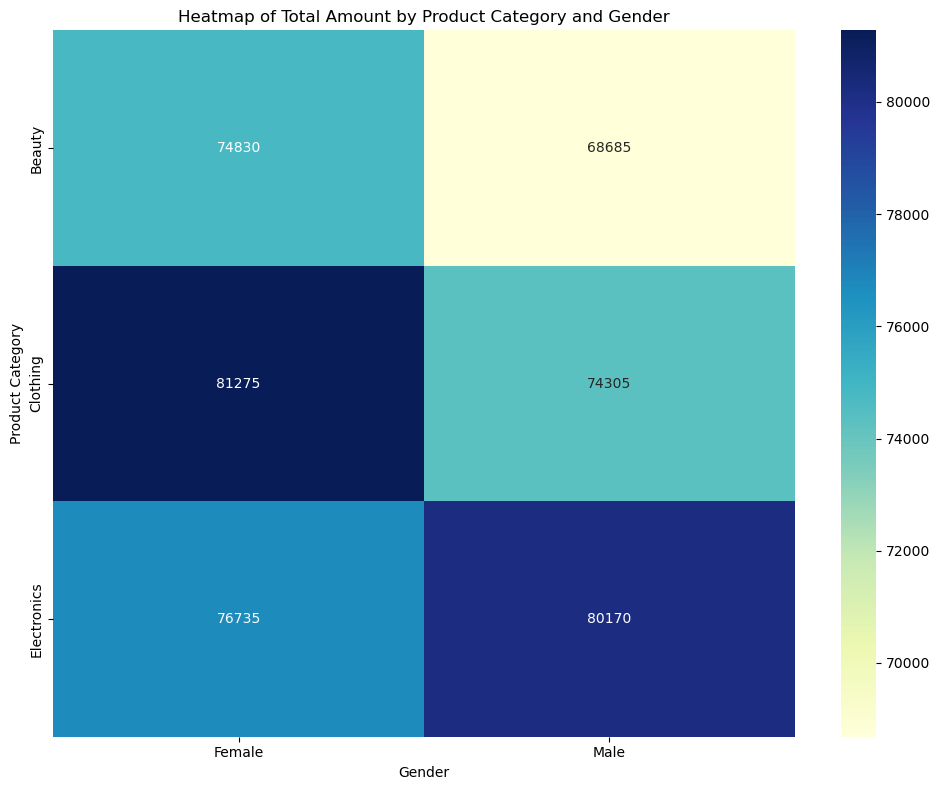

In [34]:
import numpy as np

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Product Category', columns='Gender', values='Total Amount', aggfunc=np.sum)

# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Heatmap of Total Amount by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()
